### Real World - An Investigation into the Changing Physical Profile of Professional Rugby Players over the years since Professionalism came on the scene.

**Results  From 1987 to 2007, forwards and backs have become heavier by 6.63 and 6.68 kg and taller by 0.61 and 1.09 cm, respectively.**


The purpose of this exercise is to investigate two things and check for correlation.
1. The increase in levels of concussion in Sport - looking specifically at Rugby
2. Increasing size of Rugby over the years since it went profressional.

https://www.irishtimes.com/sport/other-sports/increasing-size-of-players-behind-rise-of-concussion-in-sport-1.2041465 
Th Irish Times article called out some interesting data in relation to Rugby presented in a report to the Oireachtas back in 2014 which linked the increasing size or player to an increase in concussion rates.

- IRB figures show that over the last 15 years there has been, on average, a 10 per cent increase in player weight
-  five per cent drop in the average time for the 10m sprint
- average number of tackles in rugby has risen from 160 per match to 220

https://www.theguardian.com/sport/2013/dec/14/rugby-union-concussion-medical-experts

https://www.telegraph.co.uk/rugby-union/2016/03/02/big-hits-in-modern-rugby-are-turning-parents-off-the-game/


http://edition.cnn.com/2014/05/27/sport/rugby-sporting-physique-compared/index.html?hpt=hp_c3

**Results  From 1987 to 2007, forwards and backs have become heavier by 6.63 and 6.68 kg and taller by 0.61 and 1.09 cm, respectively.**

"The collective experience of the forwards’ pack is a value increasing with the ﬁnal ranking attained, as well as the weight of forwards and the height of backs.Conclusions  For all Rugby World Cups, the highest performing teams have the tallest backs and heaviest forwards with the highest percentage of collective"

(PDF) How they won Rugby World Cup through height, mass and collective experience. Available from: https://www.researchgate.net/publication/221846203_How_they_won_Rugby_World_Cup_through_height_mass_and_collective_experience [accessed Dec 13 2018].

![Graphic of Size change example](https://github.com/JohnONeillGMIT/RealWorld/blob/master/Walesonline%20-%20NZ%20stats.JPG?raw=true)


### Objective
To create a Dataframe to simulate a data set showing the characteristics of Professional Rugby players since it became a professional sport and how these have developed over the last two decades.

Focus on Weight and Height and match statistics

Sources for data are varied and involved trawling through team profile to develop an understanding of player profiles; also referncing online Newspaper and magazine type information as well as published medical data.

### Creating the Dataset 

For demonstration purposes the boxplot below gives a real life example to show the changes in the Munster squad, not to mention the gap in size between Backs and Forwards.

In [23]:
#importing the libraries required
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import seaborn as sns

In [24]:
df1= pd.read_csv("https://raw.githubusercontent.com/JohnONeillGMIT/RealWorld/master/munster.csv")

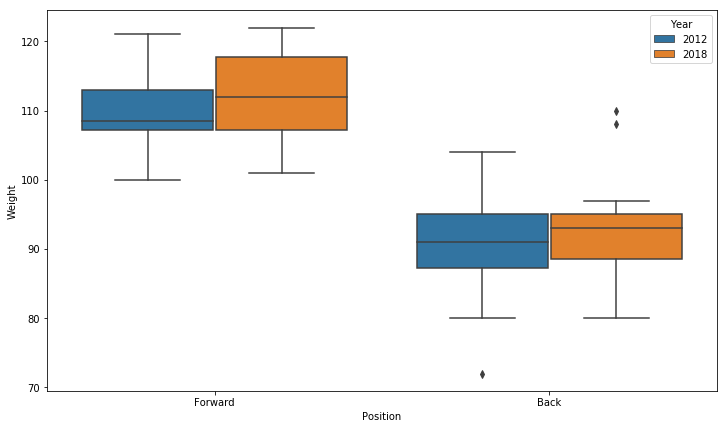

In [25]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="Position",y="Weight",hue="Year",data=df1)

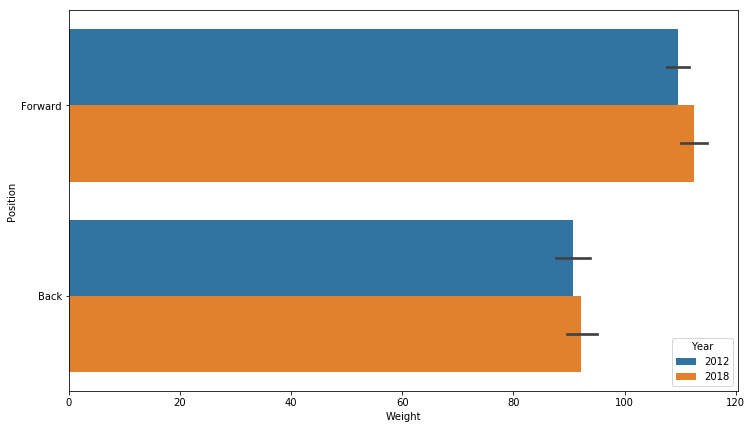

In [26]:
plt.figure(figsize=(12, 7))#setting plot size
sns.barplot(x="Weight",y="Position",hue="Year",data=df1)
#seaborn boxplot calling on one variable in x axis for Height

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html

### Building up the Data Set using numpy.random
The simulation requires the creation of a Dataframe which is to be appended etc. with new columns as the dat set builds. Over time the relationship (some Obvious) betwen the variables is investigated and highlighted.

Initally creating an empty Dataframe which will be populated using the numpy.random library to generate data and populate the columns.

In [27]:
df = pd.DataFrame(columns=['Year','Position','BMI'],index=range(100))
df.head(1)
#https://cmdlinetips.com/2018/01/how-to-create-pandas-dataframe-from-multiple-lists/

,Year,Position,BMI
0,NaN,NaN,NaN


### Adding Year Column

In [46]:
df['Year'] = np.random.choice(list(dates.year),len(df))
df.head(2)

,Year,Position,BMI,ForwardWeight(KG),ForwardHeight(cm),Number
0,2010,NaN,31.327224,108.17,185.82,7
1,2002,NaN,33.139287,108.22,180.71,14


### Simulating Data for Typical Forward Position
Research has shown that the range of weights has trended up from 109K to 112KG approx. over the last 10-15 years.Corresponding to these weight is a marginal increase in the heights of players of 3cm.

In [28]:
#Working to guess the slope of the Players H&W Slope Forwards
Fh = [188,188.46]
Fw = [109.53,112.46]  
from scipy.stats import linregress
linregress(Fh, Fw)

LinregressResult(slope=6.3695652173911785, intercept=-1087.9482608695416, rvalue=1.0, pvalue=0.0, stderr=0.0)

In [29]:
#Setting the Variation for the Forwards
np.random.seed(2)
w=np.arange(108,113,0.05)+ np.random.normal(1,2) #Setting the Weight Variation
d=1.71*w+ np.random.normal(1.0,2.5, w.size) #Setting the Height Variation

In [30]:
df['ForwardWeight(KG)'] = w.round(2)
df.head(2)

,Year,Position,BMI,ForwardWeight(KG)
0,NaN,NaN,NaN,108.17
1,NaN,NaN,NaN,108.22


In [31]:
df['ForwardHeight(cm)'] = d.round(2)
df.head(2)

,Year,Position,BMI,ForwardWeight(KG),ForwardHeight(cm)
0,NaN,NaN,NaN,108.17,185.82
1,NaN,NaN,NaN,108.22,180.71


### Increasing Weight and Height Trend
.... not to extrapolate !:-)

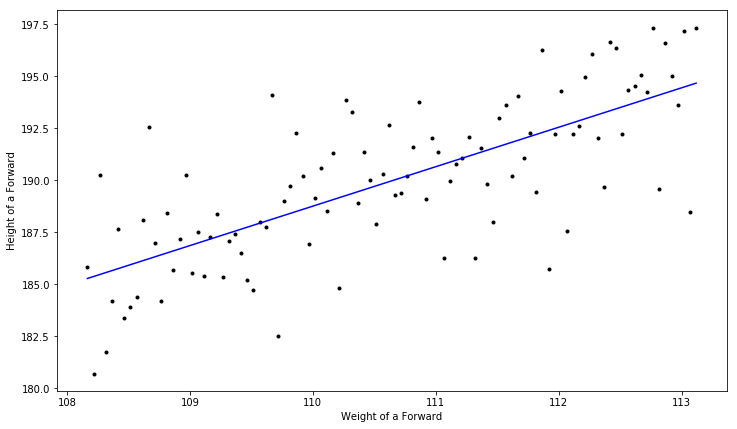

In [44]:
plt.figure(figsize=(12, 7))
plt.plot(w,d,'k.')
plt.plot (w, 1.89801149*w +-20.0217663 ,'b-', label='Best fit Line')
plt.xlabel('Weight of a Forward')
plt.ylabel('Height of a Forward')
plt.show()

Below using numpy.random an array of weights and likely corresponding heights have been set up.
The relationship between height and heights shows a definite linear correlation. As one would expect there are always going to be outlying variables but there is an evident upward left to right trajectory between the Weight and Heights of the "Forwards".

### Sum of Least Squares (Minimising the Cost)
The polyfit functions serves to create the best fit.

In [42]:
np.polyfit(w,d,1)

array([  1.89801149, -20.0217663 ])

* **Repeat for Backs
* Append/ concatenate Backs and Forward data
* compare Backs to Forwards over time
* Do BMI calculations and Assign status
* Investigate other topics re tackle count /scores etc...**


In [41]:
df['BMI']= df['ForwardWeight(KG)']/ (df['ForwardHeight(cm)']**2)*10000
df.head(3)

,Year,Position,BMI,ForwardWeight(KG),ForwardHeight(cm),Number
0,2013,NaN,31.327224,108.17,185.82,7
1,2001,NaN,33.139287,108.22,180.71,14
2,2016,NaN,29.916065,108.27,190.24,3








# The Point I Ran out of Runway!!!







In [33]:
#index creation
dates = pd.date_range(start="1997",periods=21,freq="A-jan")
dates.year # I only want to return the year
#https://stackoverflow.com/questions/13648774/get-year-month-or-day-from-numpy-datetime64

Int64Index([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64')

In [40]:
jersey = [i for i in range(1,16)]
df['Number'] = np.random.choice(list(jersey),len(df)) #fix...
df.head(2)

,Year,Position,BMI,ForwardWeight(KG),ForwardHeight(cm),Number
0,2013,NaN,31.327224,108.17,185.82,7
1,2001,NaN,33.139287,108.22,180.71,14


In [138]:
#Working to guess the slope of the Players H&W Slope Backs
Bh = [182.3,182.47]
Bw = [90.7, 92.21]
from scipy.stats import linregress
linregress(Bh, Bw)

LinregressResult(slope=8.8823529411770696, intercept=-1528.5529411765799, rvalue=1.0, pvalue=0.0, stderr=0.0)

In [22]:
np.random.seed(1)
df['Year'] = np.random.choice(list(dates.year),len(df))
df.head(5)

NameError: name 'dates' is not defined

https://www.youtube.com/watch?v=hUes6y2b--0

### Creating a Dataframe

Using this as a refernece point and study aid
https://pandas.pydata.org/pandas-docs/stable/10min.html#object-creation

In order to simulate the required data a number of steps are to be folloed initially.
1. Create an empty Dataframe of 500 sample size
2. Populate each column with generated data to build a table to be used later to investigate the dataset.

In [10]:
# if Number is greater than 9 and no if not determines if a Back or Forward
df['Position'] = np.where(df['Number']>=9, 'Back', 'Forward')

In [16]:
df.loc[df['Position'] == "Back"

SyntaxError: unexpected EOF while parsing (<ipython-input-16-bf916521a629>, line 1)

In [17]:
np.random.seed(1)
df['Height'] = np.random.uniform(189.17,201,len(df))

In [161]:
np.random.seed(1)
df['Weight'] = np.random.uniform(109,114,len(df))+ np.random.normal(1,2)

In [39]:
#Sort by multiple columns
df.sort_values(by=['Year','Position','Number'])
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

KeyError: 'Number'

BMI Categories: 
Underweight = <18.5
Normal weight = 18.5–24.9 
Overweight = 25–29.9 
Obesity = BMI of 30 or greater

In [26]:
df.describe()

,Year,Height,Weight,BMI,Number
count,499.000000,499.000000,499.000000,499.000000,499.000000
mean,2007.008016,195.189565,112.309412,29.480177,7.541082
std,5.983909,3.511838,2.835000,0.316725,4.267630
min,1997.000000,189.171353,107.451092,28.962477,1.000000
25%,2002.000000,192.140374,109.847892,29.203110,4.000000
50%,2007.000000,195.483119,112.546389,29.451882,8.000000
75%,2012.000000,198.258102,114.786549,29.754624,11.000000
max,2017.000000,200.968329,116.974433,30.026181,15.000000


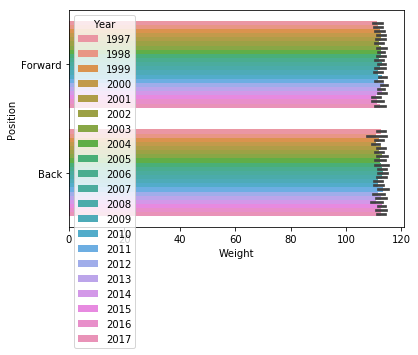

In [22]:
sns.boxplot(x="Weight",y="Position",hue="Year",data=df)

BMI is calculated by dividing your weight in kilograms by your height in metres squared. 

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html
